In [1]:
import os
import utils_general_porpose
import pandas as pd
import re
from nltk.util import ngrams
from collections import Counter
import csv
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [2]:
current_dir = os.getcwd()
print("Current directory:", current_dir)
#data = utils_general_porpose.load_json(current_dir, "/concepts/clinical_concepts_20250404_171428.json")
data = utils_general_porpose.load_json(current_dir, "/performance_zine/clinical_concepts_20250428_135703.json")

Current directory: /home/pajaro/compu_Pipe_V3


In [3]:
df = pd.DataFrame(data)
df.head()

,id_cliente,label,entities,codes
0,1619,1.0,demencia_no_especificada desnutricion_proteico...,C0497327 C0349366 C0497327 C0349366 C0497327 C...
1,5256,1.0,hipertension_esencial_(primaria) infarto_antig...,C0085580 C0155668 C0478671 C0478671 C0478671 C...
2,7039,1.0,artritis_no_especificada artritis_reumatoide_n...,C0003864 C0003873
3,9669,1.0,otro_dolor_cronico sindrome_de_manguito_rotato...,C0478148 C0263912 C0263912 C0478148 C0263912 C...
4,10915,1.0,malformacion_congenitas_de_las_camaras_cardiac...,C0478009 C0010200 C0478009 C0010200 C0154301 C...


In [4]:
def cleanReviews(documents):
    cleanedReviews = []
    for document in documents:
        #s = re.sub(r'[^a-zA-Z0-9\s]', '', document)
        #s = re.sub('\s+',' ', s)
        s = str(document).lower()
        tokens = [token for token in s.split(" ") if token != ""]
        tokens = [word for word in tokens if word not in ['enfermedad']]               
        review = ' '.join(tokens)
        cleanedReviews.append(review)
    return(cleanedReviews)

In [5]:
def documentNgrams(documents, size):
    ngrams_all = []
    for document in documents:
        tokens = document.split()
        if len(tokens) <= size:
            continue
        else:
            output = list(ngrams(tokens, size))
        for ngram in output:
            ngrams_all.append(" ".join(ngram))
    cnt_ngram = Counter()
    for word in ngrams_all:
        cnt_ngram[word] += 1
    df = pd.DataFrame.from_dict(cnt_ngram, orient='index').reset_index()
    df = df.rename(columns={'index':'words', 0:'count'})
    df = df.sort_values(by='count', ascending=False)
    df = df.head(15)
    df = df.sort_values(by='count')
    return(df)

In [10]:
def plotNgrams(documents):
    #unigrams = documentNgrams(documents, 1)
    bigrams = documentNgrams(documents, 2)
    trigrams = documentNgrams(documents, 3)
    
    # Set plot figure size
    fig = plt.figure(figsize = (20, 7))
    plt.subplots_adjust(wspace=.5)

    #ax = fig.add_subplot(131)
    #ax.barh(np.arange(len(unigrams['words'])), unigrams['count'], align='center', alpha=.5)
    #ax.set_title('Unigrams')
    #plt.yticks(np.arange(len(unigrams['words'])), unigrams['words'])
    #plt.xlabel('Count')

    ax2 = fig.add_subplot(121)
    ax2.barh(np.arange(len(bigrams['words'])), bigrams['count'], align='center', alpha=.5)
    ax2.set_title('Bigrams')
    plt.yticks(np.arange(len(bigrams['words'])), bigrams['words'])
    plt.xlabel('Count')

    ax3 = fig.add_subplot(122)
    ax3.barh(np.arange(len(trigrams['words'])), trigrams['count'], align='center', alpha=.5)
    ax3.set_title('Trigrams')
    plt.yticks(np.arange(len(trigrams['words'])), trigrams['words'])
    plt.xlabel('Count')

    plt.show()

In [11]:
def textTrends(documents):
    cleanedReviews = cleanReviews(documents)
    plotNgrams(cleanedReviews)

In [12]:
negApnea = df[df["label"] == 0]
print(negApnea.shape)
posApnea = df[df["label"] == 1]
print(posApnea.shape)

(192, 4)
(732, 4)


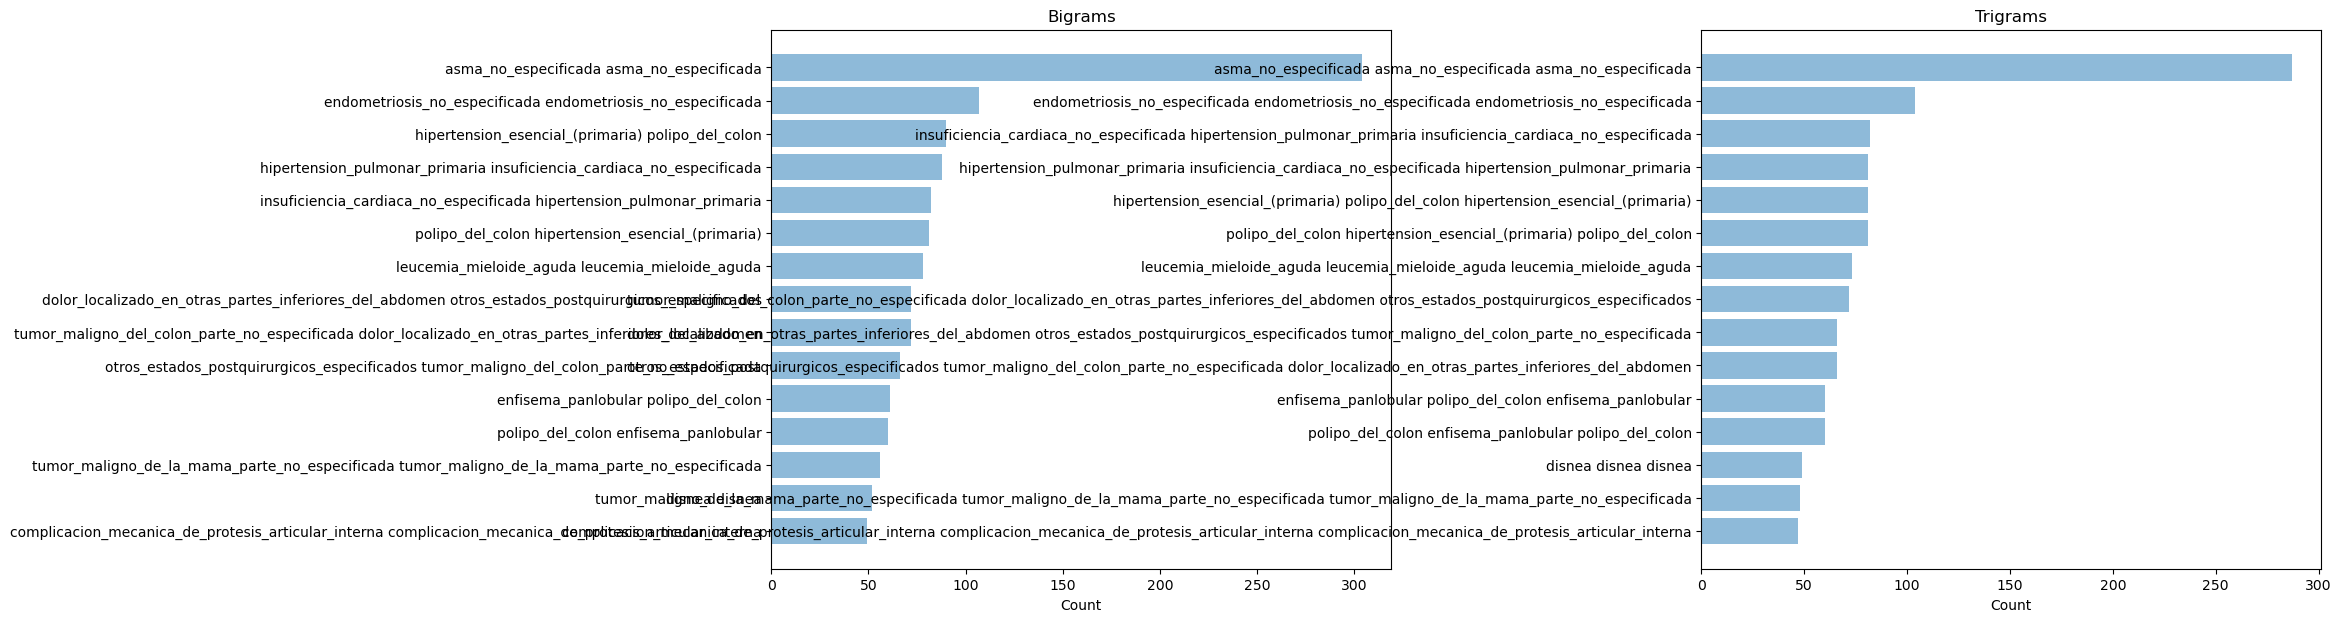

In [13]:
textTrends(negApnea["entities"])

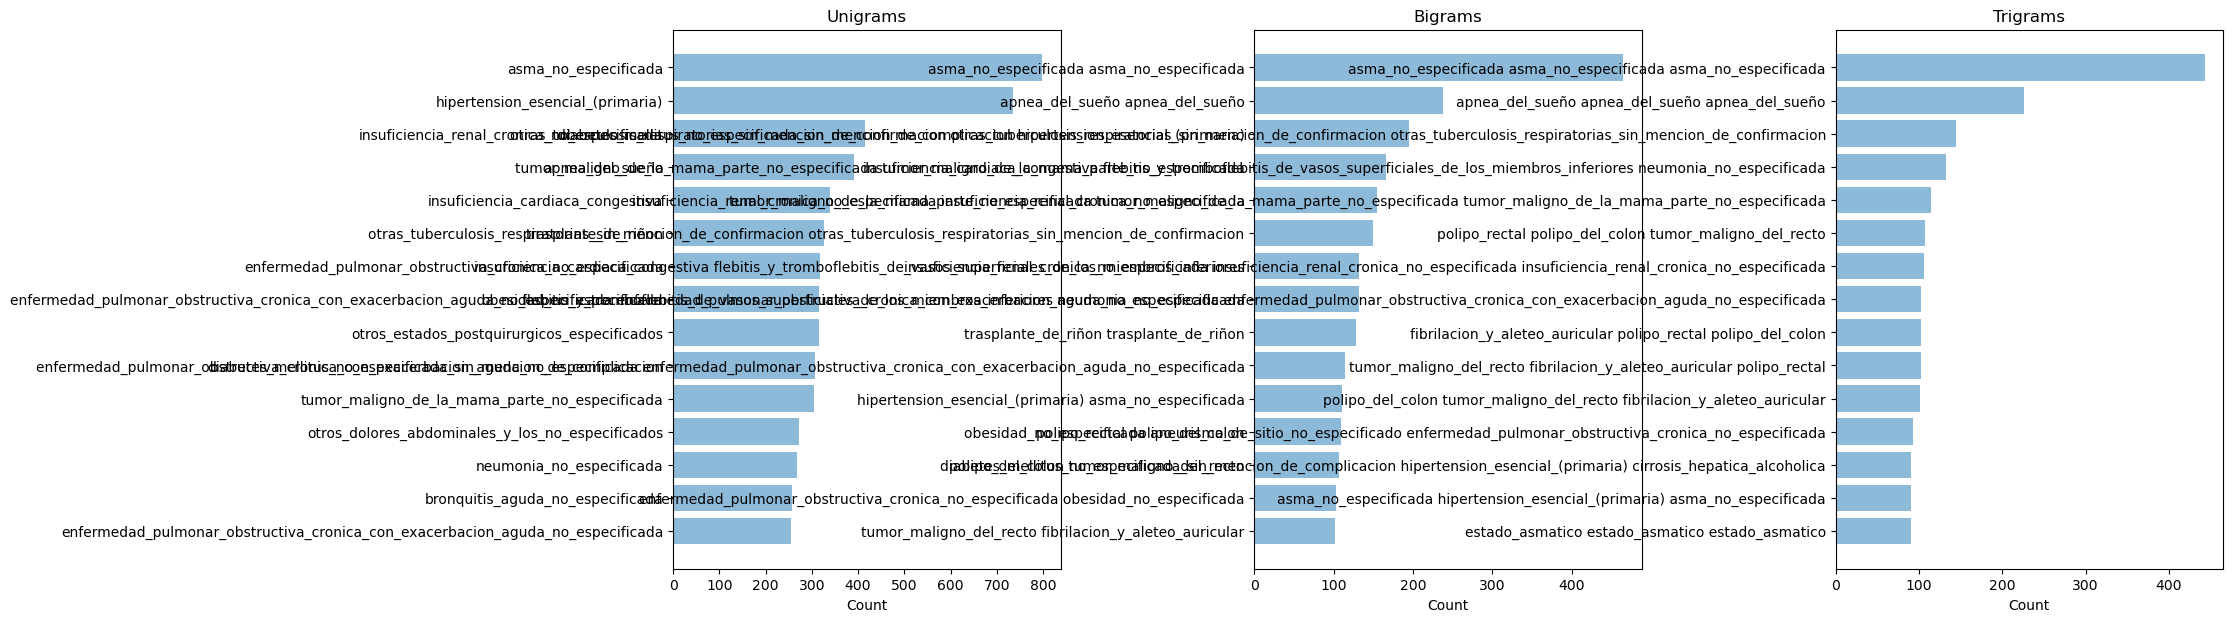

In [11]:
textTrends(posApnea["entities"])

In [12]:
from collections import Counter

def count_top_words(datasets, top_n=20, exclude_words=None):
    """
    Counts the frequency of words across a series of datasets and returns the top N most frequent words.

    Args:
        datasets (list): A list of strings, where each string represents a dataset.
        top_n (int): The number of top frequent words to return.
        exclude_words (set): A set of words to exclude from the count.

    Returns:
        list: A list of tuples with the top N most frequent words and their counts.
    """
    if exclude_words is None:
        exclude_words = set()

    word_counter = Counter()

    for dataset in datasets:
        # Split the dataset into words and normalize to lowercase
        words = dataset.lower().split()
        # Filter out excluded words
        filtered_words = [word for word in words if word not in exclude_words]
        # Update the word counter with the current dataset
        word_counter.update(filtered_words)

    return word_counter.most_common(top_n)

In [13]:
#df.info()
# Count the top 20 words in the "entities" column
#excluder_words = set(stopwords.words('spanish'))
excluder_words = {"enfermedad", "paciente"}
top_words = count_top_words(df["entities"], top_n=20, exclude_words=excluder_words)
print("Top 20 words in the 'entities' column:")
for word, count in top_words:
    print(f"{word}: {count}")
"""
# Create a bar chart for the top 20 words
words, counts = zip(*top_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Top 20 Words in Entities Column')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
"""

Top 20 words in the 'entities' column:
asma_no_especificada: 1168
hipertension_esencial_(primaria): 917
otros_estados_postquirurgicos_especificados: 541
insuficiencia_renal_cronica_no_especificada: 425
enfermedad_pulmonar_obstructiva_cronica_no_especificada: 419
apnea_del_sueño: 401
obesidad_no_especificada: 389
insuficiencia_cardiaca_congestiva: 381
tumor_maligno_de_la_mama_parte_no_especificada: 371
trasplante_de_riñon: 365
diabetes_mellitus_no_especificada_sin_mencion_de_complicacion: 318
otros_dolores_abdominales_y_los_no_especificados: 298
neumonia_no_especificada: 289
enfermedad_pulmonar_obstructiva_cronica_con_exacerbacion_aguda_no_especificada: 282
polipo_del_colon: 276
bronquitis_aguda_no_especificada: 272
infeccion_de_vias_urinarias_sitio_no_especificado: 267
dolor_en_el_pecho_no_especificado: 253
artritis_reumatoide_no_especificada: 231
obesidad_debida_a_exceso_de_calorias: 227


"\n# Create a bar chart for the top 20 words\nwords, counts = zip(*top_words)\nplt.figure(figsize=(10, 6))\nplt.bar(words, counts)\nplt.xlabel('Words')\nplt.ylabel('Counts')\nplt.title('Top 20 Words in Entities Column')\nplt.xticks(rotation=45)\nplt.tight_layout()\nplt.show()\n"

In [14]:
excluder_words = {"enfermedad", "paciente"}
top_words = count_top_words(posApnea["entities"], top_n=20, exclude_words=excluder_words)
print("Top 20 clinical concepts in patients with apena:")
for word, count in top_words:
    print(f"{word}: {count}")

Top 20 clinical concepts in patients with apena:
asma_no_especificada: 801
hipertension_esencial_(primaria): 740
insuficiencia_renal_cronica_no_especificada: 416
apnea_del_sueño: 395
insuficiencia_cardiaca_congestiva: 340
trasplante_de_riñon: 326
obesidad_no_especificada: 321
enfermedad_pulmonar_obstructiva_cronica_no_especificada: 319
otros_estados_postquirurgicos_especificados: 316
diabetes_mellitus_no_especificada_sin_mencion_de_complicacion: 306
tumor_maligno_de_la_mama_parte_no_especificada: 305
otros_dolores_abdominales_y_los_no_especificados: 273
neumonia_no_especificada: 268
bronquitis_aguda_no_especificada: 260
enfermedad_pulmonar_obstructiva_cronica_con_exacerbacion_aguda_no_especificada: 254
dolor_en_el_pecho_no_especificado: 214
fibrilacion_y_aleteo_auricular: 213
infeccion_de_vias_urinarias_sitio_no_especificado: 204
obesidad_debida_a_exceso_de_calorias: 200
hipotiroidismo_no_especificado: 197


In [15]:
excluder_words = {"enfermedad", "paciente"}
top_words = count_top_words(negApnea["entities"], top_n=20, exclude_words=excluder_words)
print("Top 20 clinical concepts in patients without apnea:")
for word, count in top_words:
    print(f"{word}: {count}")

Top 20 clinical concepts in patients without apnea:
asma_no_especificada: 367
otros_estados_postquirurgicos_especificados: 225
hipertension_esencial_(primaria): 177
polipo_del_colon: 155
endometriosis_no_especificada: 111
enfermedad_pulmonar_obstructiva_cronica_no_especificada: 100
fiebre_no_especificada: 97
leucemia_mieloide_aguda: 95
hipertension_pulmonar_primaria: 93
insuficiencia_cardiaca_no_especificada: 91
dolor_localizado_en_otras_partes_inferiores_del_abdomen: 90
tumor_maligno_del_colon_parte_no_especificada: 78
obesidad_no_especificada: 68
tumor_maligno_de_la_mama_parte_no_especificada: 66
infeccion_de_vias_urinarias_sitio_no_especificado: 63
enfisema_panlobular: 61
estado_asmatico: 61
gonartrosis_no_especificada: 58
disnea: 58
mieloma_multiple: 57


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  924 non-null    int64  
 1   label       924 non-null    float64
 2   entities    924 non-null    object 
 3   codes       924 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 29.0+ KB


In [17]:
bigrams = documentNgrams(df["entities"], 2)
print(type(bigrams))

<class 'pandas.core.frame.DataFrame'>


In [18]:
bigrams.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 1519 to 263
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   words   15 non-null     object
 1   count   15 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 360.0+ bytes


In [19]:
bigrams.head()

,words,count
1519,polipo_rectal polipo_del_colon,109
640,hipertension_esencial_(primaria) asma_no_espec...,110
18,dolor_en_el_pecho_no_especificado dolor_en_el_...,113
50,artritis_reumatoide_no_especificada artritis_r...,119
5216,flebitis_y_tromboflebitis_de_vasos_superficial...,132


In [20]:
print(bigrams.sort_values(by='count', ascending=False))

                                                  words  count
263           asma_no_especificada asma_no_especificada    769
119                     apnea_del_sueño apnea_del_sueño    240
1813  tumor_maligno_de_la_mama_parte_no_especificada...    222
212   diabetes_mellitus_no_especificada_sin_mencion_...    198
444   insuficiencia_renal_cronica_no_especificada in...    158
1178  otras_tuberculosis_respiratorias_sin_mencion_d...    150
288             trasplante_de_riñon trasplante_de_riñon    140
984   enfermedad_pulmonar_obstructiva_cronica_con_ex...    139
545   otros_estados_postquirurgicos_especificados ot...    139
5216  flebitis_y_tromboflebitis_de_vasos_superficial...    132
5215  insuficiencia_cardiaca_congestiva flebitis_y_t...    132
50    artritis_reumatoide_no_especificada artritis_r...    119
18    dolor_en_el_pecho_no_especificado dolor_en_el_...    113
640   hipertension_esencial_(primaria) asma_no_espec...    110
1519                     polipo_rectal polipo_del_colon

In [4]:
#df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  924 non-null    int64  
 1   label       924 non-null    float64
 2   entities    924 non-null    object 
 3   codes       924 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 29.0+ KB


In [7]:
df[:10]

,id_cliente,label,entities,codes
0,1619,1.0,demencia_no_especificada desnutricion_proteico...,C0497327 C0349366 C0497327 C0349366 C0497327 C...
1,5256,1.0,hipertension_esencial_(primaria) infarto_antig...,C0085580 C0155668 C0478671 C0478671 C0478671 C...
2,7039,1.0,artritis_no_especificada artritis_reumatoide_n...,C0003864 C0003873
3,9669,1.0,otro_dolor_cronico sindrome_de_manguito_rotato...,C0478148 C0263912 C0263912 C0478148 C0263912 C...
4,10915,1.0,malformacion_congenitas_de_las_camaras_cardiac...,C0478009 C0010200 C0478009 C0010200 C0154301 C...
5,12045,1.0,artritis_reumatoide_no_especificada artritis_r...,C0003873 C0003873 C0003873 C0003873 C0003873 C...
6,12884,1.0,otras_artritis_especificadas otro_dolor_cronic...,C0477550 C0478148 C0478148 C0478148 C0020676 C...
7,13558,1.0,trastornos_interno_de_la_rodilla_no_especifica...,C0158053 C0451840 C0451840 C0451840 C0451840 C...
8,13590,1.0,apnea_del_sueño hipertension_esencial_(primari...,C0037315 C0085580 C0031880 C0037315 C0028754 C...
9,14457,0.0,tumor_maligno_de_la_mama_parte_no_especificada,C0006142


In [9]:
def imprimir_fragmentos(df, columna_id, columna_texto, columna_etiqueta, tamaño_fragmento=10):
    """
    Divide el texto en fragmentos de N palabras y los imprime junto a su ID y etiqueta.

    Args:
        df: DataFrame que contiene los datos.
        columna_id: nombre de la columna con identificador del texto.
        columna_texto: nombre de la columna que contiene el texto.
        columna_etiqueta: nombre de la columna con etiquetas binarias.
        tamaño_fragmento: número de palabras por fragmento.
    """
    for idx, row in df.iterrows():
        texto_id = row[columna_id]
        texto = str(row[columna_texto])
        etiqueta = row[columna_etiqueta]
        palabras = texto.split()

        for i in range(0, len(palabras), tamaño_fragmento):
            fragmento = ' '.join(palabras[i:i + tamaño_fragmento])
            if fragmento:
                print(f"[{texto_id}] [{etiqueta}] {fragmento}")


In [12]:
imprimir_fragmentos(df[:20], "id_cliente", 'entities', 'label', tamaño_fragmento=10)

[1619] [1.0] demencia_no_especificada desnutricion_proteicocalorica_moderada demencia_no_especificada desnutricion_proteicocalorica_moderada demencia_no_especificada desnutricion_proteicocalorica_moderada demencia_no_especificada otros_trastornos_organicos_de_la_personalidad_y_del_comportamiento_debidos_a_enfermedad_lesion_y_disfuncion_cerebrales desnutricion_proteicocalorica_moderada demencia_no_especificada
[1619] [1.0] otros_trastornos_organicos_de_la_personalidad_y_del_comportamiento_debidos_a_enfermedad_lesion_y_disfuncion_cerebrales desnutricion_proteicocalorica_moderada demencia_no_especificada otros_trastornos_organicos_de_la_personalidad_y_del_comportamiento_debidos_a_enfermedad_lesion_y_disfuncion_cerebrales desnutricion_proteicocalorica_moderada demencia_no_especificada desnutricion_proteicocalorica_moderada demencia_no_especificada otros_trastornos_organicos_de_la_personalidad_y_del_comportamiento_debidos_a_enfermedad_lesion_y_disfuncion_cerebrales diabetes_mellitus_insulin